# V - Phylogenetic Tree Construction

With this code you can construct a phylogenetic tree. You only need a list of Genbank accession numbers.

You can find all material in our GitHub repository iGEM_UGent_2020. 

## Set your working directory

First, set up your working directory. Standard, this is the location where this jupyter notebook is situated. 

In [12]:
import os
wdir = os.getcwd()
print(wdir)

C:\Users\강석민\Desktop\iGEM_UGent_2020-master\From Sequences to Relationships\5 - Phylogenetic Tree


## Obtain sequences

We start from a file with accession numbers and the country of origin. 

I got the accession numbers from https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/virus?SeqType_s=Nucleotide&VirusLineage_ss=Severe%20acute%20respiratory%20syndrome%20coronavirus%202,%20taxid:2697049

There you can choose your countries of interest. For this tutorial, I chose five sequences per continent. Thus, we will create a phylogenetic with thirty sequences in total. 

In [13]:
import csv
from Bio import SeqIO
from Bio import Entrez

fasta_file = {}
ct = 0

Entrez.email = "A.N.Other@example.com"
with open('accessions.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        print(row)
        with Entrez.efetch(db="nucleotide", rettype="gb", retmode = "text", id = row[0]) as handle:
            for seq_record in SeqIO.parse(handle, "gb"):
                fasta_file[row[1]] = str(seq_record.seq)
                ct += 1  
      
print("Number of sequences in file:", ct)

# save all sequences in the multi-fasta file "sequences_general.txt"

f = open("sequences.txt","w+")
for keys,values in fasta_file.items():
    f.write(">" + str(keys) + "\n" + str(values) + "\n")
f.close()

['MT905416', 'Egypt']
['MT890204', 'Ghana']
['MT872492', 'Sierra-Leone']
['MT576584', 'Nigeria']
['MT549878', 'Kenya']
['NC_045512', 'China']
['MT876526', 'Bangladesh']
['LC573284', 'Japan']
['MT825091', 'Iran']
['MT820472', 'Saudi-Arabia']
['MT479216', 'Italy']
['MT890462', 'Russia']
['MT704821', 'Germany']
['MT747438', 'Belgium']
['MT328032', 'Greece']
['MT966087', 'USA(FL)']
['MT810770', 'Mexico']
['MT276328', 'USA(OR)']
['MT263422', 'USA(WA)']
['MT821624', 'USA(WA2)']
['MT007544', 'Australia(Melbourne)']
['MT612216', 'Australia(Victoria)']
['MT451211', 'Australia(Victoria2)']
['MT459987', 'Guam']
['MT706050', 'New-Zealand ']
['MT835383', 'Brazil']
['MT670021', 'Chile']
['MT907518', 'Venezuela']
['MT263074', 'Peru']
['MT670014', 'Chile2']
Number of sequences in file: 30


## Multiple sequence alignment (MSA)

You can choose between the locally installed or browser-based Clustal Omega. In this tutorial, we use the locally installed version. You can find the Clustal Omega file on github. You only have to unzip clustalo.zip and store it in the same folder as this notebook. 

In [14]:
from Bio.Align.Applications import ClustalOmegaCommandline

in_file = "sequences.txt"

out_file = "alignment_covid.fasta"

clustalomega_cline = ClustalOmegaCommandline(infile = in_file, outfile = out_file, verbose=True, auto=False)

print(clustalomega_cline)


# WINDOWS
# Python will fill out clustal omega in the command line for you!
path = "r'" + str(wdir) #.'
input_command = '"' + wdir + '/clustal-omega-1.2.2-win64/' + str(clustalomega_cline)[0:8] + '" ' + str(clustalomega_cline)[9:] + '-threads=1'
os.system(input_command)

"""
# MAC
# Python will fill out clustal omega in the command line for you!
input_command = "./" + str(clustalomega_cline)
os.system(input_command)
"""

clustalo -i sequences.txt -o alignment_covid.fasta -v


'\n# MAC\n# Python will fill out clustal omega in the command line for you!\ninput_command = "./" + str(clustalomega_cline)\nos.system(input_command)\n'

You can find the result of the msa in your working directory. It will be a fasta-file with the same name as the 'out_file'.

## Draw tree

Before drawing the actual tree, we create a distance matrix. This forms the basis for the tree. 

In [15]:
out_file = "alignment_covid.fasta"

# Read alignment file
from Bio import AlignIO
align = AlignIO.read(out_file, "fasta")
print(align)

# Calculate distance matrix
from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)
print(dm)

Alignment with 30 rows and 29911 columns
-----------------------------AACCAACCAACTTTC...--- Egypt
--------------------------------------ACTTTC...--- Ghana
------GGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...--- Sierra-Leone
----------------------------------------TTTC...--- Nigeria
--------------------------------------------...--- Kenya
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...--- China
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...--- Bangladesh
-------------ACCTTCCCAGGTAACAAACCAACCAACTTTC...--- Japan
------------------------------------------TC...--- Iran
------------------------------------CAACTTTC...--- Saudi-Arabia
------------------------------------------TC...--- Italy
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...--- Russia
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...--- Germany
--------------------------------------------...--- Belgium
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTC...--- Greece
--------------------------------------ACTTTC...--- USA(FL)
-------------------

Drawing the phylogenetic tree using UPGMA (unweighted pair group method with arithmetic mean) method

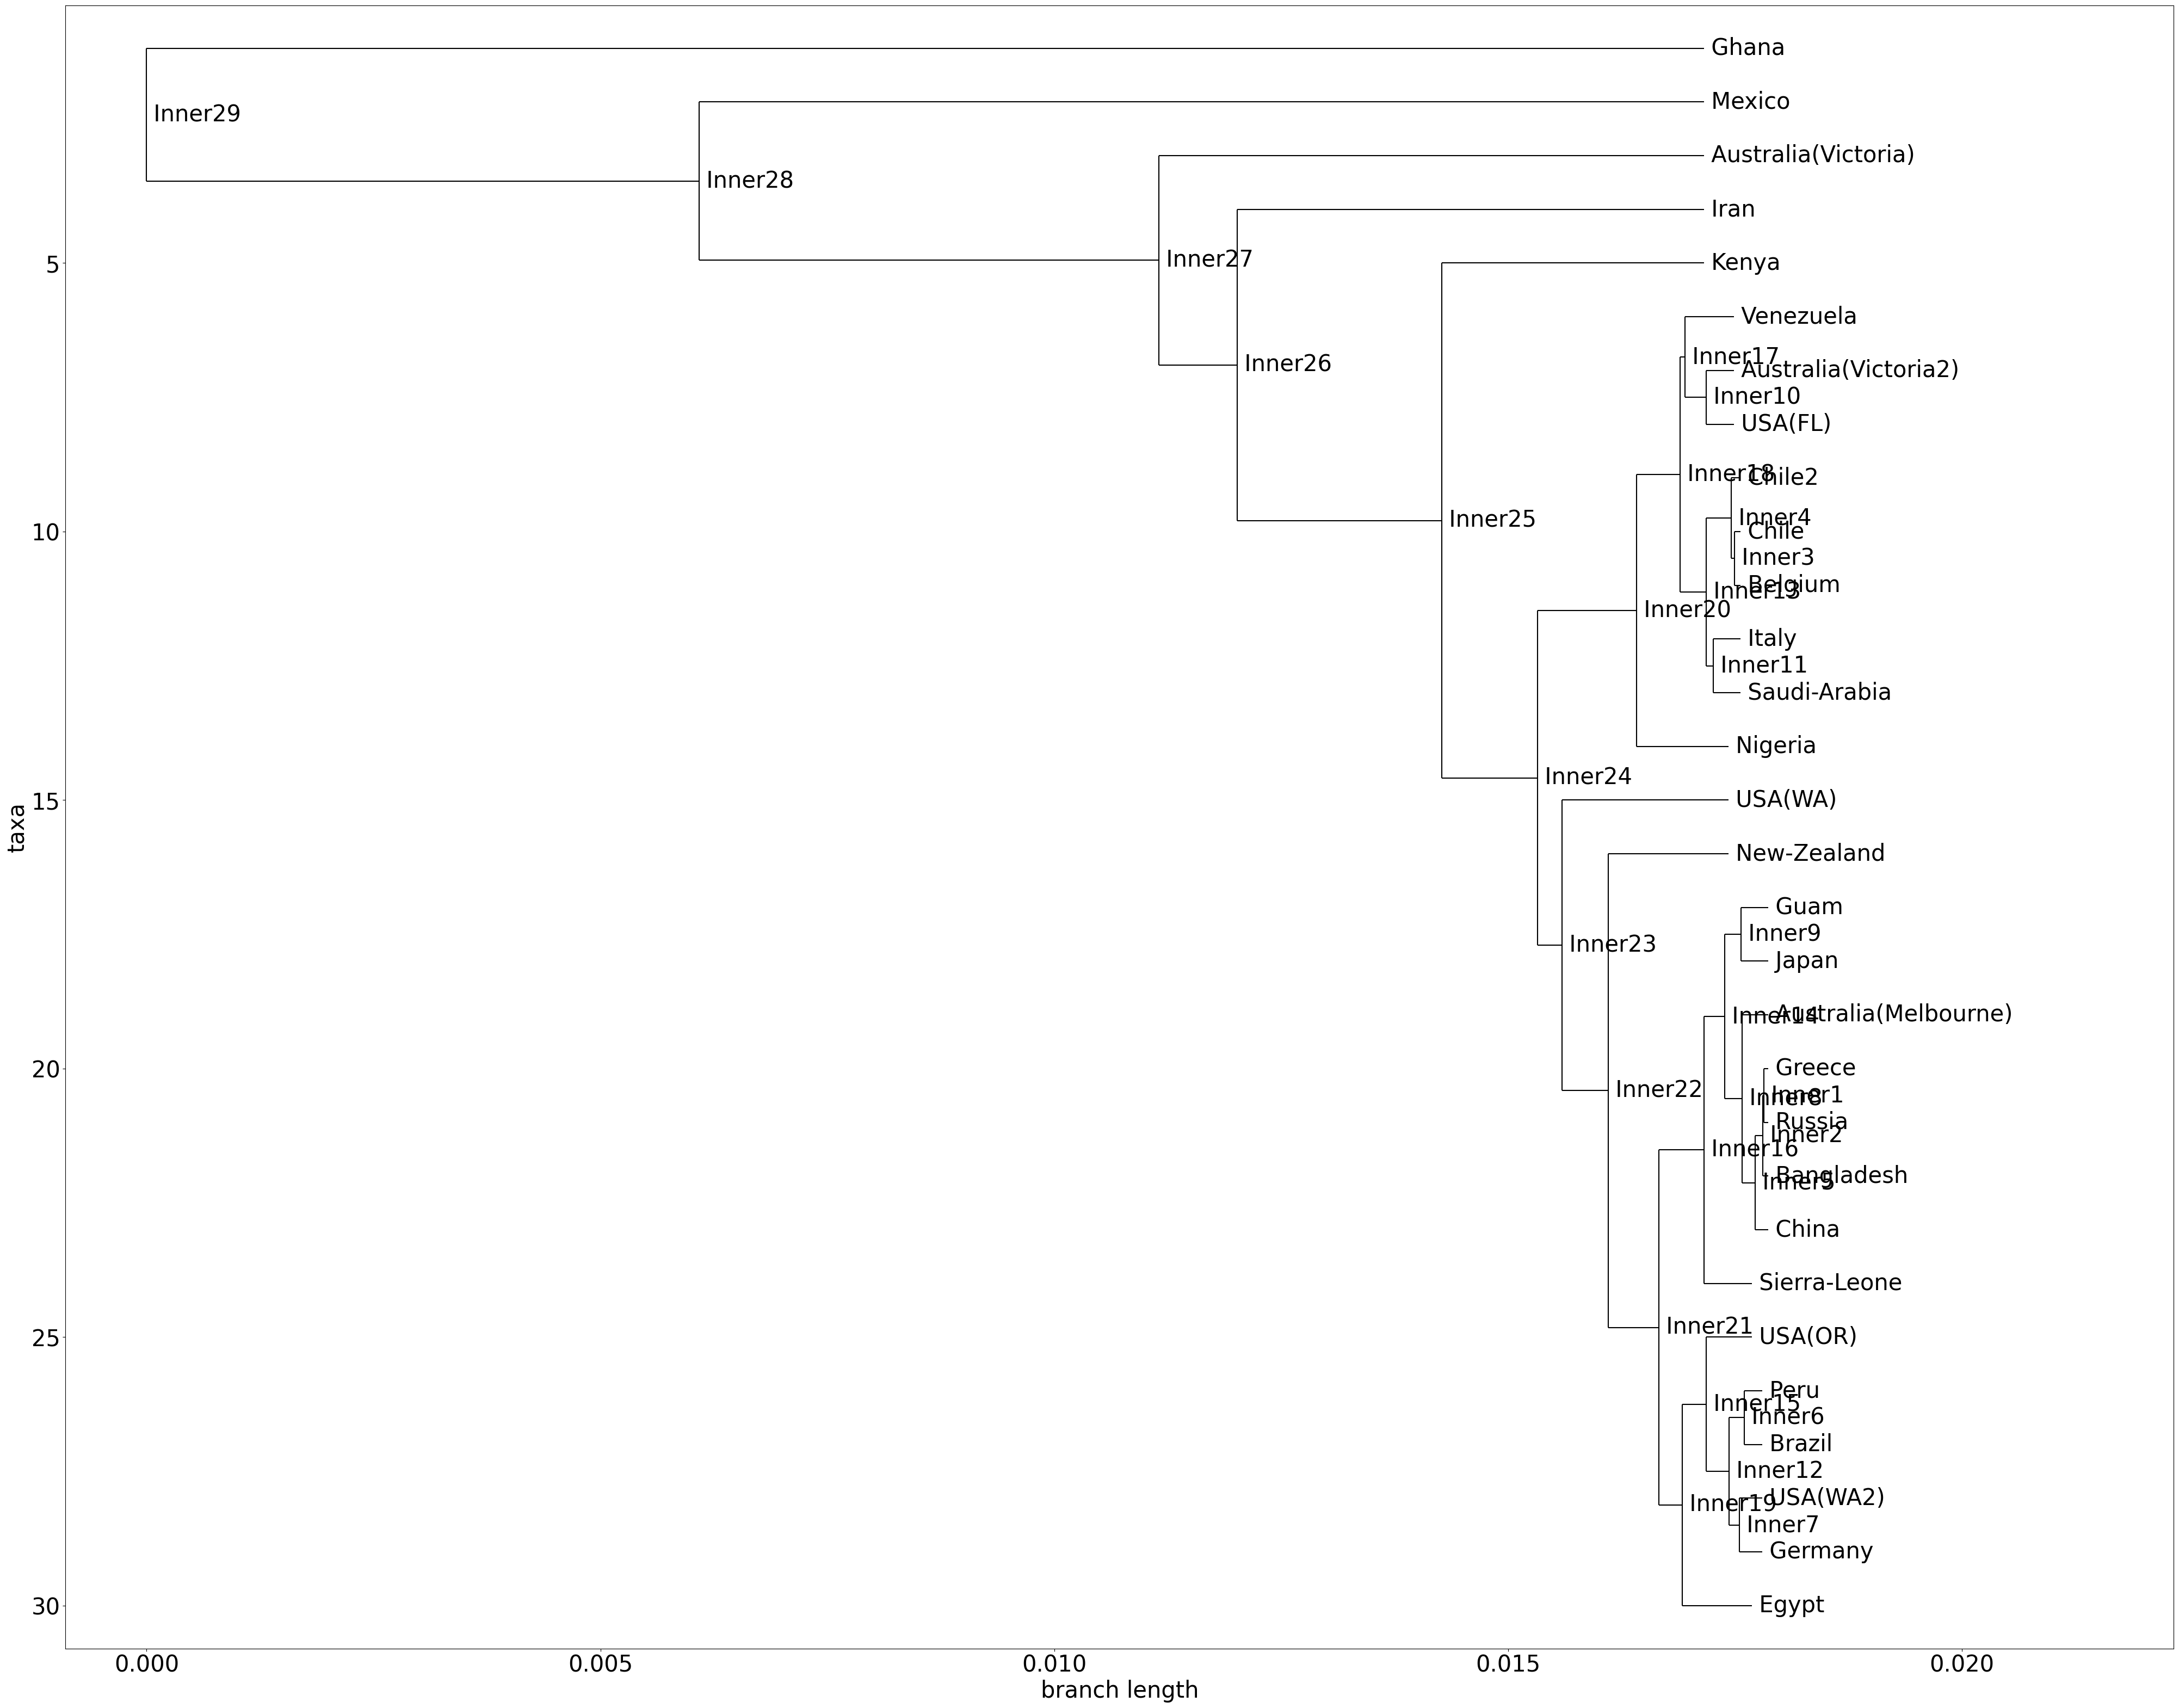

  __________________________________________________ Ghana
 |
_|                  ________________________________ Mexico
 |                 |
 |_________________|               _________________ Australia(Victoria)
                   |              |
                   |              |   ______________ Iran
                   |______________|  |
                                  |  |       _______ Kenya
                                  |  |      |
                                  |  |      |       , Venezuela
                                  |__|      |       |
                                     |      |       , Australia(Victoria2)
                                     |      |       |
                                     |      |       | USA(FL)
                                     |      |      _|
                                     |      |     | |, Chile2
                                     |______|     | ,|
                                            |     | |, Chile
     

In [16]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

import matplotlib
import matplotlib.pyplot as plt

def plot_tree(tree, output_file):
    # set the size of the figure
    fig = plt.figure(figsize=(50, 40), dpi=100)
    # fig.set_size_inches(10, 20) # in inches
    plt.rcParams.update({'font.size':30})
    axes = fig.add_subplot(1, 1, 1)
    fig1 = plt.gcf()
    Phylo.draw(tree, axes=axes, branch_labels=None)
    Phylo.draw_ascii(tree)
    fig1.savefig(output_file, dpi=100)
    return

plot_tree(tree,"tree.jpg")

*Exercice*: Can you write a piece of code to remove the 'Inner' clades in the tree object? This will result in a more readible phylogenetic tree!

## References & further reading

Chang, J., Chapman, B., Friedberg, I., Hamelryck, T., de Hoon, M., Cock, P., Antao, T., Talevich, E., Wilczynski, B. (2020). Biopython Tutorial and Cookbook, Biopython 1.77. Available via biopython.org

